# Machine Learning

This week's workshop is all about machine learning. We're going to start simple, using decision trees, and gradually move to more complex models.


## Decision trees

Let's start with the simple decision trees that we learned about in this week's lecture. 

Decision trees are a type of supervised machine learning algorithm that is used for both classification and regression tasks. They work by repeatedly splitting the data into distinct nodes, which represent decision points based on the values of the input features. 


We will here use the decision tree to categorize data points in the Iris dataset.

The Iris dataset is one of the best-known and most frequently used datasets in the field of machine learning and statistics. It was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper titled "The use of multiple measurements in taxonomic problems." 

The dataset consists of 150 observations of iris flowers. There are three different species of iris included in the dataset:

- Iris setosa
- Iris versicolor
- Iris virginica

These have different petal lengths and widths. Our task is to train a decision tree so that it categorizes the flower species using these two properties.

Let's start by plotting the data, with the two features.

In [ ]:
# If you haven't instaled scikit-learn, now's the time. It's our go-to library for ML.
# !pip3 install scikit-learn

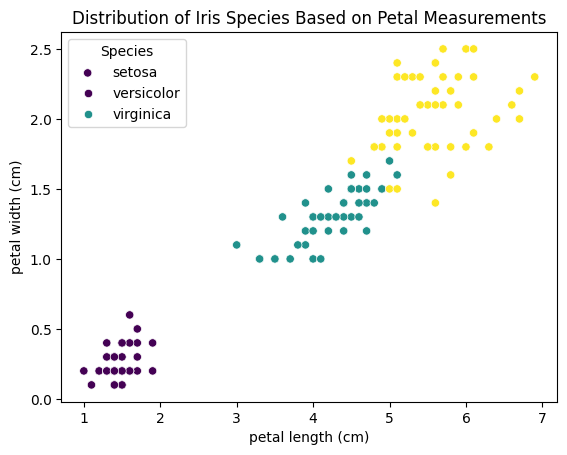

In [25]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load data
iris = load_iris()

# Convert the last two features (petal length and width) to a DataFrame
feature_names = iris.feature_names[2:4]  # This captures 'petal length (cm)' and 'petal width (cm)'
X = pd.DataFrame(iris.data[:, 2:4], columns=feature_names)
y = iris.target

# Add the target to the DataFrame for easier plotting
X['species'] = y

# Scatter plot for petal dimensions using seaborn for automatic legend handling
sns.scatterplot(data=X, x='petal length (cm)', y='petal width (cm)', hue='species', palette='viridis')

plt.title('Distribution of Iris Species Based on Petal Measurements')
plt.legend(title='Species', labels=list(iris.target_names))
plt.show()


Now, let's train a Decision Tree to separate the three types of flowers!

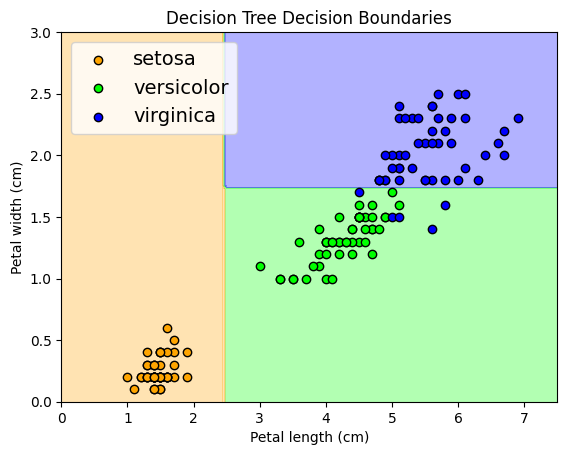

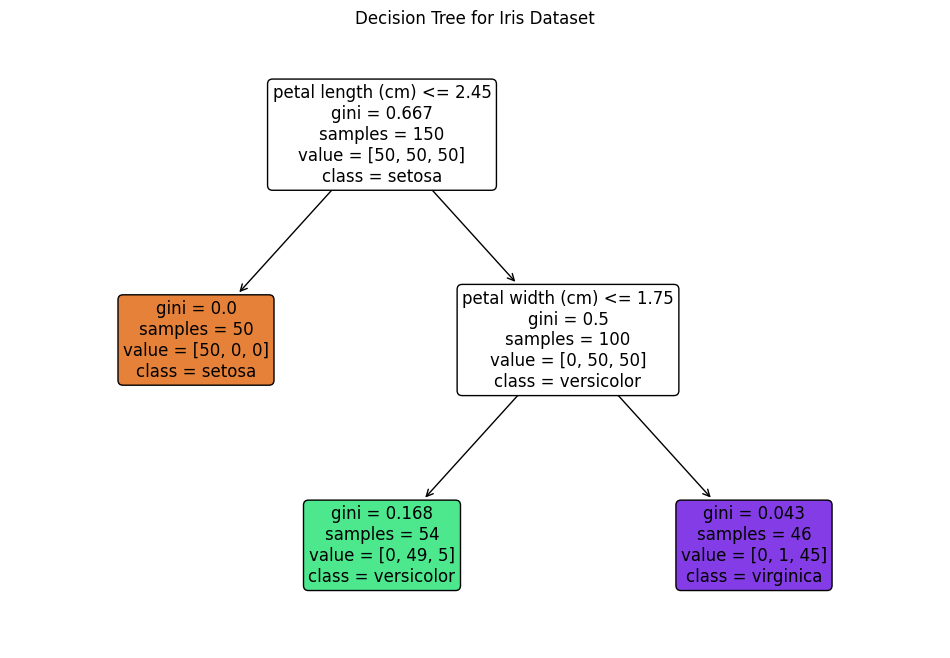

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Create and fit the model
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X.drop('species', axis=1), y)  # Ensure to drop the species column for training

def plot_decision_boundary(clf, X_df, axes=[0, 7.5, 0, 3]):
    # Define color map for consistent color usage in contourf and scatter plot
    cmap = ListedColormap(['#FFA500', '#00FF00', '#0000FF'])
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    X_new_df = pd.DataFrame(X_new, columns=X_df.columns[:-1])  # Use feature names
    y_pred = clf.predict(X_new_df).reshape(x1.shape)
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
    for i, class_name in enumerate(iris.target_names):
        plt.scatter(X_df[X_df['species'] == i].iloc[:, 0], X_df[X_df['species'] == i].iloc[:, 1], 
                    color=cmap(i), label=class_name, edgecolor='k')
    plt.axis(axes)
    plt.xlabel("Petal length (cm)")
    plt.ylabel("Petal width (cm)")
    plt.legend(loc="upper left", fontsize=14)

# Plotting the decision boundary
plot_decision_boundary(tree_clf, X, [0, 7.5, 0, 3])
plt.title("Decision Tree Decision Boundaries")
plt.show()

# Plot the decision tree
plt.figure(figsize=(12,8))
plot_tree(tree_clf, filled=True, feature_names=iris.feature_names[2:4], class_names=iris.target_names, rounded=True, fontsize=12)
plt.title('Decision Tree for Iris Dataset')
plt.show()

### Exercise 1: New observations 
<a href='#solution1'>Go to solution</a>

You come across some additional observations of flower petals. 
    [{'petal length (cm)': 5.1, 'petal width (cm)': 1.5},
    {'petal length (cm)': 4.5, 'petal width (cm)': 1.3},
    {'petal length (cm)': 6.0, 'petal width (cm)': 2.2}]

Can you identify their type manually by using the decision tree above? 

You can also use the model to do so, by using the .predict(X) function!


In [190]:
new_observations = [
    {'petal length (cm)': 5.1, 'petal width (cm)': 1.5},
    {'petal length (cm)': 4.5, 'petal width (cm)': 1.3},
    {'petal length (cm)': 6.0, 'petal width (cm)': 2.2}
]

# Convert to DataFrame
new_df = pd.DataFrame(new_observations)

# What type of flowers are these?

## Let's revisit Trump's tweets!

Machine learning allows flexible annotation and prediction from textual data. It can be used for nearly any text analysis tasks. 

In our case, we will focus on whether there are differences in the messages when Trump posts from iPhone and Android. 

He began to post from iPhone when he started as President, and it seems these message might actually come from his aids.

We train machine learning to guess based on the text in the tweets whether he is sending the message from Android or iPhone. Can we predict it?

In [ ]:
#We focus on the messages that are from iPhone or Android
df = pd.read_csv('trumptweets.csv')
df = df.loc[df['device'].isin(set(['Twitter for iPhone', 'Twitter for Android']))] 


In [ ]:
# Preprocess the text as usual
df['text'] = df['text'].apply(clean_text).apply(case_normalization).apply(tokenization).apply(remove_stopwords).apply(lemmatize)

The following code:

1. Splits the dataset into training and testing sets.
2. Vectorizes the messages using a bag-of-words model, excluding common English stop words for more meaningful feature analysis.
3. Trains a RandomForestClassifier on the vectorized training data.
4. Predicts the device category on the test data and prints out the classification report and accuracy.
5. Extracts and prints the feature importances to see which words are the most discriminative in terms of predicting the device used.

The most important features output will give you insight into which words are more characteristic of messages sent from either iphone or android. Keep in mind that feature importance in random forests doesn't always equate to causality, and high importance might be due to correlation rather than a causal relationship.

In [ ]:
# Train machine learning to identify 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the dataset into training and testing sets
# The text is what we use to try to predict the device. 
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['device'], test_size=0.3, random_state=42)

# Vectorize the text messages into a bag-of-words model
vectorizer = CountVectorizer(stop_words='english') # Drop stopwords in English
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Use a machine learning classifier, in this case, a Random Forest
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_vectorized, y_train)

# Predict the device used for the test set
predictions = classifier.predict(X_test_vectorized)

## This is the end of the ML code. Easy, no?
#-------
##### The rest is printing and evaluation ####

# Evaluate the classifier
print(classification_report(y_test, predictions))
print("Accuracy:", accuracy_score(y_test, predictions))

# Get feature importances
feature_importances = classifier.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Map feature importances to their corresponding words
feature_importance_dict = {word: importance for word, importance in zip(feature_names, feature_importances)}

# Sort the words by their feature importance
sorted_feature_importances = sorted(feature_importance_dict.items(), key=lambda item: item[1], reverse=True)

# Print out the most important features (words)
# for word, importance in sorted_feature_importances[:20]:  # top 20 words
#     print(f"Word: {word}, Importance: {importance}")

# After fitting the CountVectorizer on the training set
X_vectorized = vectorizer.transform(df['text'])

# Create a DataFrame with the word counts
word_counts = pd.DataFrame(X_vectorized.toarray(), columns=vectorizer.get_feature_names_out())

# Add the device column back to the DataFrame
word_counts['device'] = df['device'].values

# Calculate the sum of word counts for each device
word_counts_sum = word_counts.groupby('device').sum()

# Now you can compare the word counts for each word in your feature importances list
for device in word_counts['device'].unique():
    print(f'\n {device}')
    for word, importance in sorted_feature_importances[:40]:  # top 20 words
        counts = word_counts_sum[word]
        more_common_in = counts.idxmax()
        if more_common_in == device:
            print(f"{word}, Importance: {importance}")

                     precision    recall  f1-score   support

Twitter for Android       0.92      0.85      0.89      4267
 Twitter for iPhone       0.93      0.96      0.95      8487

           accuracy                           0.93     12754
          macro avg       0.92      0.91      0.92     12754
       weighted avg       0.93      0.93      0.93     12754

Accuracy: 0.9261408185667241

 Twitter for iPhone
rt, Importance: 0.09219865618700993
https, Importance: 0.07479567686469239
democrats, Importance: 0.007854489610218278
fake, Importance: 0.004395329867710581
biden, Importance: 0.004356324246503931
news, Importance: 0.003770457493192382
whitehouse, Importance: 0.0037658816642760747
amp, Importance: 0.0032052454826699993
thank, Importance: 0.002850430960313691
president, Importance: 0.002721501564856787
great, Importance: 0.0026927675922088002
impeachment, Importance: 0.0025705125682693717
election, Importance: 0.002547904148514072
joe, Importance: 0.002355241776796686
obama,

### Question: Interpret model performance 

<a href='#answer'>Go to answer</a>

What do the results listed in the classification report above mean - precision, recall, f1-score? How well does the model distinguish between the two sets of messages? What does this imply?





## Exercise 2: Classifier: spam or ham?
<a href='#solution2'>Go to solution</a>

Your task is to adapt the classifier above to identify if a text message is spam or not. 

We will us an existing database of text messages. 

How high accuracy can you achieve? 

In [ ]:
# Load the spam file
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# [YOUR CODE HERE]

[Go to Solution](#exercise2)

## LLM and Supervised BERT model
An extremely powerful and state-of-the-art approach is to use LLMs to get training data, and a supervised BERT model to 

BERT models are also large language models, and draw on a sophisticated understanding of language in their predictions.


Our example here will be to use headlines from New York Times.

Our research question is: how much is the New York Times talking about politics?

We will, for economic and computational reasons, focus only on headlines here - but the results would likely improve by using the full articles.

In [ ]:
import pandas as pd

We're going to use a dataset of all New York Times headlines 1987-2007.

You can download the unlabelled dataset from: https://drive.google.com/file/d/1Lalb-HweXCxdbl4yd_EKX4NBRGDIoQ7s/view?usp=sharing 

And the finished labelled dataset from:  https://drive.google.com/file/d/10vieNCfBI_LYzhtb8GMwLGMGS8KufHP5/view?usp=sharing

In [65]:
df = pd.read_csv('nytheadlines.csv.gz',compression='gzip')

We will first take a random sample of 1000 headlines, and use an LLM to classify them to give us training data.

In [69]:
sample = df.sample(1000)

In [70]:
sample

,0,1
134714,1996-9,Some Iraqis Are Still Dug In Inside the Kurdis...
214622,1988-9,Answering the Mail
1241795,2001-1,Faulkner and Conrad As Working-Class Heroes
1414890,1999-6,Weyerhaeuser Agrees to Buy MacMillan Bloedel f...
1663107,1991-2,Bloomingdale's Union Asked to Forgo Raise
...,...,...
676613,2004-6,"Paid Notice: Deaths SCHWARTZ, EDWARD R."
34588,2002-12,ALL IN THE FAMILY
435286,1994-5,No Rape Charges Against Detective
1517521,1995-6,Yankees Drum Up Solution of Their Own


### Classify using OpenAI ChatGPT

This code takes one headline at the time and feeds it to ChatGPT to classify whether it is political or not.

In [77]:
# This is our classification prompt
PROMPT = "Classify whether the given New York Times headline is related to politics. Respond with '1' if the headline involves a political subject, and '0' if it does not. No explanation is needed."

In [73]:
# !pip install openai

In [74]:

import openai
from openai import OpenAI


In [197]:
#We define which model to use throughout
MODEL = 'gpt-3.5-turbo-0125' # We use the cheap model 
WAIT_TIME = 0.01 # Wait time between each request. This depends on the rate limit of the model used

client = OpenAI(
    api_key= '[SECRET API KEY]' #Set the API key. See the how-to guide for further instructions
)


In [88]:
# Simple function for analyzing a message with OpenAI
def analyze_message(text, temperature=0.2):
    try:
        response = client.chat.completions.create(
            model = MODEL, 
            temperature=temperature,
            messages=[
                    {"role": "system", "content": f"'{PROMPT}'"}, #The system instruction tells the bot how it is supposed to behave
                    {"role": "user", "content": f"'{text}'"} #This provides the text to be analyzed.
                ]
        )
        result = ''
        for choice in response.choices:
            result += choice.message.content
        print(f"{text}: {result}")
        return result 
    except Exception as e:
        # Not the prettiest solution; but easy
        print(f'Exception happened: {e}')
        return 'error'
       

Let's try it!

In [89]:
analyze_message("'Bloomingdale's Union Asked to Forgo Raise'")

'Bloomingdale's Union Asked to Forgo Raise': 1


'1'

Yay, it works! 

Now we only need to do this for our entire sample.

Here's a reliable way of running a process on a large number of datapoints. We want to make sure that if the process crashes at some point, we won't lose our progress. We therefore save the results regularly.


In [92]:
# We start by defining a new column with the result
sample['is_political'] = None
# We store original persistently
sample.to_csv('sample.csv.gz',compression='gzip',index=False)

In [ ]:
import time 
i = 0
while(True):

    #Find all unprocessed lines; where 
    left = sample.loc[sample['is_political'].isna()]
    
    #No lines left? Then we're done
    if len(left)==0:
        print("All done!")
        break
        
    #Take a random line
    line = left.sample()
    index = line.index.values[0]
    text = line['1'].values[0]
    
    print(f"There are {len(left)} left to process. Processing: {index}")
    
    #Wait for a bit, to not overload the API
    time.sleep(WAIT_TIME)
    
    #Analyze the specific line, chunk by chunk    
    result = analyze_message(text)
    sample.loc[index,'is_political'] = result 

    i+=1    
    #Save the result to persistent file
    sample.to_csv('sample.csv.gz',compression='gzip',index=False)

Done! Let's check the result

In [100]:
sample.groupby(['is_political']).count()['0']

is_political
0    737
1    263
Name: 0, dtype: int64

About 26% of the articles are political in this dataset.

Let's train a supervised BERT model on this data. 

In [105]:
#Actually, let's rename the columns for aestethical reasons 
sample = sample.rename(columns={'0':'month','1':'text'})

df = df.rename(columns={'0':'month','1':'text'})

In [30]:
# These are packages for the BERT model.

# !pip install transformers torch sklearn

In [119]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from datasets import Dataset
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
import torch

# Convert labels from strings to integers
sample['label'] = sample['is_political'].astype(int)

# Split the data into training and validation sets
train_df, eval_df = train_test_split(sample, test_size=0.1)

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function to preprocess the text data
def tokenize_data(example):
    return tokenizer(example['text'], padding='max_length', truncation=True, max_length=128)

# Create Hugging Face Dataset objects
train_dataset = Dataset.from_pandas(train_df)
eval_dataset = Dataset.from_pandas(eval_df)
train_dataset = train_dataset.map(tokenize_data, batched=True)
eval_dataset = eval_dataset.map(tokenize_data, batched=True)

# Load BERT with a sequence classification head
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Metric computation: we define this to get more details on the performance of the model
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics
)

# Train and evaluate
trainer.train()

Map:   0%|          | 0/900 [00:00<?, ? examples/s]

Map:   0%|          | 0/100 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/339 [00:00<?, ?it/s]

{'loss': 0.6666, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.09}
{'loss': 0.6621, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.18}
{'loss': 0.599, 'learning_rate': 3e-06, 'epoch': 0.27}
{'loss': 0.5902, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.35}
{'loss': 0.6118, 'learning_rate': 5e-06, 'epoch': 0.44}
{'loss': 0.5492, 'learning_rate': 6e-06, 'epoch': 0.53}
{'loss': 0.5372, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.62}
{'loss': 0.4998, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.71}
{'loss': 0.5201, 'learning_rate': 9e-06, 'epoch': 0.8}
{'loss': 0.4694, 'learning_rate': 1e-05, 'epoch': 0.88}
{'loss': 0.5615, 'learning_rate': 1.1000000000000001e-05, 'epoch': 0.97}


  0%|          | 0/7 [00:00<?, ?it/s]

{'eval_loss': 0.48081138730049133, 'eval_accuracy': 0.78, 'eval_f1': 0.5217391304347827, 'eval_precision': 0.75, 'eval_recall': 0.4, 'eval_runtime': 0.8725, 'eval_samples_per_second': 114.609, 'eval_steps_per_second': 8.023, 'epoch': 1.0}
{'loss': 0.3868, 'learning_rate': 1.2e-05, 'epoch': 1.06}
{'loss': 0.3976, 'learning_rate': 1.3000000000000001e-05, 'epoch': 1.15}
{'loss': 0.4272, 'learning_rate': 1.4000000000000001e-05, 'epoch': 1.24}
{'loss': 0.4373, 'learning_rate': 1.5e-05, 'epoch': 1.33}
{'loss': 0.3737, 'learning_rate': 1.6000000000000003e-05, 'epoch': 1.42}
{'loss': 0.317, 'learning_rate': 1.7000000000000003e-05, 'epoch': 1.5}
{'loss': 0.4448, 'learning_rate': 1.8e-05, 'epoch': 1.59}
{'loss': 0.2177, 'learning_rate': 1.9e-05, 'epoch': 1.68}
{'loss': 0.3189, 'learning_rate': 2e-05, 'epoch': 1.77}
{'loss': 0.3083, 'learning_rate': 2.1e-05, 'epoch': 1.86}
{'loss': 0.3387, 'learning_rate': 2.2000000000000003e-05, 'epoch': 1.95}


  0%|          | 0/7 [00:00<?, ?it/s]

{'eval_loss': 0.2902424931526184, 'eval_accuracy': 0.88, 'eval_f1': 0.7777777777777777, 'eval_precision': 0.875, 'eval_recall': 0.7, 'eval_runtime': 0.8802, 'eval_samples_per_second': 113.61, 'eval_steps_per_second': 7.953, 'epoch': 2.0}
{'loss': 0.2532, 'learning_rate': 2.3000000000000003e-05, 'epoch': 2.04}
{'loss': 0.1496, 'learning_rate': 2.4e-05, 'epoch': 2.12}
{'loss': 0.1592, 'learning_rate': 2.5e-05, 'epoch': 2.21}
{'loss': 0.2321, 'learning_rate': 2.6000000000000002e-05, 'epoch': 2.3}
{'loss': 0.1865, 'learning_rate': 2.7000000000000002e-05, 'epoch': 2.39}
{'loss': 0.2215, 'learning_rate': 2.8000000000000003e-05, 'epoch': 2.48}
{'loss': 0.3448, 'learning_rate': 2.9e-05, 'epoch': 2.57}
{'loss': 0.1414, 'learning_rate': 3e-05, 'epoch': 2.65}
{'loss': 0.2751, 'learning_rate': 3.1e-05, 'epoch': 2.74}
{'loss': 0.264, 'learning_rate': 3.2000000000000005e-05, 'epoch': 2.83}
{'loss': 0.0323, 'learning_rate': 3.3e-05, 'epoch': 2.92}


  0%|          | 0/7 [00:00<?, ?it/s]

{'eval_loss': 0.48702967166900635, 'eval_accuracy': 0.88, 'eval_f1': 0.793103448275862, 'eval_precision': 0.8214285714285714, 'eval_recall': 0.7666666666666667, 'eval_runtime': 0.8748, 'eval_samples_per_second': 114.306, 'eval_steps_per_second': 8.001, 'epoch': 3.0}
{'train_runtime': 126.2226, 'train_samples_per_second': 21.391, 'train_steps_per_second': 2.686, 'train_loss': 0.37702029556651384, 'epoch': 3.0}


TrainOutput(global_step=339, training_loss=0.37702029556651384, metrics={'train_runtime': 126.2226, 'train_samples_per_second': 21.391, 'train_steps_per_second': 2.686, 'train_loss': 0.37702029556651384, 'epoch': 3.0})

### How to interpret these values? 

Training Updates
Each of the other dictionary outputs provides a snapshot of the model's training at various points in terms of loss and learning rate:

- loss: These values represent the average training loss at each reported time point. The training loss is a measure of how well the model is fitting the training data. Ideally, you want to see this value decreasing over time.

- learning_rate: This shows the learning rate at each time point. The learning rate can affect how quickly or slowly a model learns; too high could lead to overshooting minima, while too low might result in a long training process.
- epoch:  Indicates at which point in the training process (in terms of epochs) these snapshots were taken.


*What to Look For:*
1. Trends in Loss: You generally want the loss to decrease over time, which would indicate learning and improvement. Any fluctuations or increases might suggest issues such as the model beginning to overfit the training data or insufficient model capacity to learn from the data.
2. Stability and Learning Rate Adjustments: Changes in learning rate can affect model training dynamics. In your outputs, the learning rate gradually increases, which might be part of a learning rate warm-up strategy commonly used in training transformers to stabilize the updates initially.
3. Model Performance vs. Evaluation: While training loss gives you an idea of how well the model is fitting the training data, the evaluation loss tells you how well the model generalizes to new, unseen data. A significant gap between training loss and evaluation loss might indicate overfitting.
4. Epoch Reporting: Seeing performance per epoch helps in understanding the model's learning trajectory and deciding how many epochs are optimal before the model stops improving or starts overfitting.

The model has a relatively low evaluation loss, suggesting it is performing well in terms of prediction accuracy.

In [112]:
# Let's check the model's final performance!
results = trainer.evaluate()
print(results)

  0%|          | 0/7 [00:00<?, ?it/s]

{'eval_loss': 0.47201406955718994, 'eval_accuracy': 0.88, 'eval_f1': 0.793103448275862, 'eval_precision': 0.8214285714285714, 'eval_recall': 0.7666666666666667, 'eval_runtime': 0.8908, 'eval_samples_per_second': 112.258, 'eval_steps_per_second': 7.858, 'epoch': 3.0}


We have accuracy of 88%, and an F1-score of around 0.8. Not bad. But also not amazing. This suggests it would be a good idea to use more training data. 

### Let's analyze the full dataset!

Let's apply the model on the full dataset! This is a lot faster than ChatGPT - but it's still gonna take a while unless we have a GPU.

It took around 24 hours on my MacBook, not using GPU.

In [ ]:
# First some data cleaning
df = df.dropna(subset=['text'])
df = df.loc[df['text'].str.len()>20]

In [137]:
from torch.utils.data import DataLoader
from transformers import DefaultDataCollator
from datasets import Dataset

# Initialize the tokenizer and tokenization function
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text data
def tokenize_data(example):
    return tokenizer(example['text'], padding="max_length", truncation=True, max_length=128)

# Convert DataFrame to Dataset
dataset = Dataset.from_pandas(df)
dataset = dataset.map(tokenize_data, batched=True)

# Remove 'text' column as it's not needed for prediction
dataset = dataset.remove_columns(["text"])

# Predict
predictions = trainer.predict(dataset)

# Extract predicted labels from logits
import numpy as np
predicted_labels = np.argmax(predictions.predictions, axis=1)

# Update the DataFrame
df['is_political'] = predicted_labels


Map:   0%|          | 0/1531473 [00:00<?, ? examples/s]

  0%|          | 0/95718 [00:00<?, ?it/s]

/var/folders/72/yhvs2cms3j9cxd1ln67f720h0000gn/T/ipykernel_24805/641865052.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_political'] = predicted_labels


In [151]:
df.to_csv('labelled_headlines.csv.gz',compression='gzip',index=False)

In [146]:
# One article had a broken date attached to it. Let's remove it.
df = df.loc[~(df['month']=='11310-10')]

### Let's plot the amount of politics focus over time!

/var/folders/72/yhvs2cms3j9cxd1ln67f720h0000gn/T/ipykernel_24805/4042078869.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_month'] = pd.to_datetime(df['month'], format='%Y-%m')


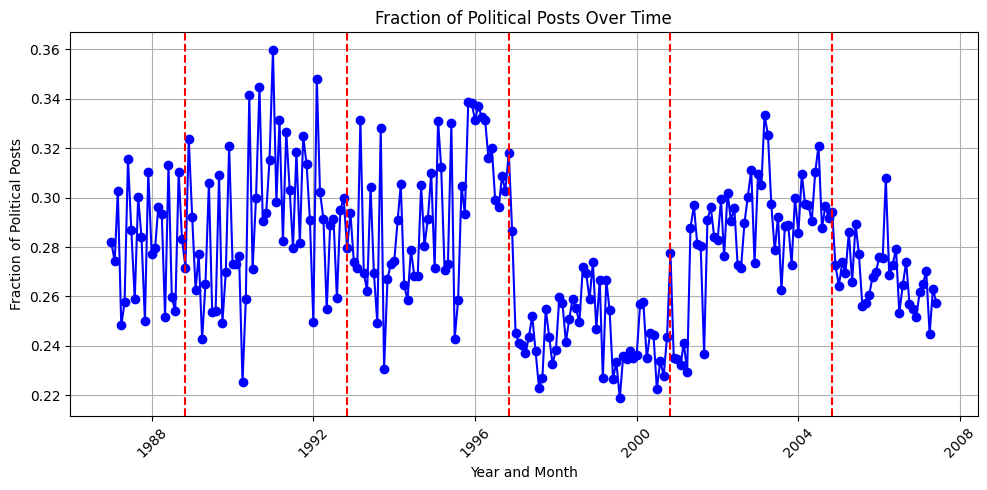

In [150]:
import matplotlib.pyplot as plt 
df['year_month'] = pd.to_datetime(df['month'], format='%Y-%m')
monthly_political = df.groupby('year_month')['is_political'].mean()

election_years = ['1988-11', '1992-11', '1996-11', '2000-11', '2004-11']
election_dates = pd.to_datetime(election_years, format='%Y-%m')

plt.figure(figsize=(10, 5))
plt.plot(monthly_political, marker='o', linestyle='-', color='b')
plt.title('Fraction of Political Posts Over Time')
plt.xlabel('Year and Month')
plt.ylabel('Fraction of Political Posts')

# Add vertical lines for each election date
for election in election_dates:
    plt.axvline(x=election, color='r', linestyle='--', label='US Presidential Election' if election == election_dates[0] else "")


plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()
plt.show()
# df.groupby(['month'])['is_political'].mean().plot()

We could then use this labelled dataset for various types of analyses, such as focusing on the content or details. Or try to figure out why there was so little political focus during the second Clinton administration!

## Solutions:
<a id="exercise1"></a>


<a id='solution1'></a>

### Solution 1: New flower

In [27]:
new_observations = [
    {'petal length (cm)': 5.1, 'petal width (cm)': 1.5},
    {'petal length (cm)': 4.5, 'petal width (cm)': 1.3},
    {'petal length (cm)': 6.0, 'petal width (cm)': 2.2}
]

# Convert to DataFrame
new_df = pd.DataFrame(new_observations)

# Predict species
predicted_species = tree_clf.predict(new_df)

# Print the predictions
species_names = iris.target_names[predicted_species]
print("Predicted species:", species_names)

Predicted species: ['versicolor' 'versicolor' 'virginica']


<a id='answer'></a>

### Answer: Interpret classification report

*Precision:* This metric measures the accuracy of *positive* predictions. It is defined as the ratio of true positives to the sum of true and false positives. Precision essentially answers the question: "Of all the messages that were labeled as coming from a specific device, how many were actually from that device?"

- Twitter for Android: 0.92 precision means that 92% of messages predicted to be from Android were correctly identified.
- Twitter for iPhone: 0.93 precision indicates that 93% of messages predicted to be from iPhone were correctly identified.

*Recall (Sensitivity)*: This metric measures the ability of the model to find all the relevant cases (all actual positives). It is the ratio of true positives to the sum of true positives and false negatives. Recall answers the question: "Of all the messages that actually came from a specific device, how many did the model correctly identify?"

- Twitter for Android: 0.85 recall suggests that the model correctly identified 85% of all actual Android messages.
- Twitter for iPhone: 0.96 recall indicates that 96% of actual iPhone messages were correctly identified by the model.

*F1-Score*: The harmonic mean of precision and recall. It is a way to combine both precision and recall into a single measure that captures both properties. 
- Twitter for Android: 0.89 F1-score indicates a good balance between precision and recall for Android.
- Twitter for iPhone: 0.95 F1-score shows an excellent balance for iPhone, suggesting effective classification.

*Support*: This simply counts the number of true instances for each label in the data, which gives insight into the dataset's skewness.
- Twitter for Android: 4267 messages
- Twitter for iPhone: 8487 messages

#### Conclusion:
The model performs quite well, with high scores across all metrics. It is particularly effective at identifying messages from the iPhone, as indicated by higher recall and F1-score. 

## Solution 2: Spam or ham?
<a id='solution2'></a>

We can use almost exactly the same code as for the Trump tweets

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Data preparation
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

texts = np.array(df['v2'])
labels = np.array([0 if t=='ham' else 1 if t=='spam' else None for t in df['v1']])  # 1 - spam, 0 - not spam

# Vectorization
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Model training
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1453
           1       1.00      0.81      0.90       219

    accuracy                           0.98      1672
   macro avg       0.99      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672

